In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import numpy as np

sns.set_style()

In [6]:
spy_ticker = yf.Ticker('SPY') # SP500
ibb_ticker = yf.Ticker('IBB') # iShares NASDAQ Biotechnology ETF
gbio_ticker = yf.Ticker('GBIO')

In [161]:
spy = spy_ticker.history(period = '6mo')
ibb = ibb_ticker.history(period = '6mo')
gbio = gbio_ticker.history(period = '6mo')

In [9]:
spy.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [132]:
spy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-05,375.880005,381.980011,372.899994,381.959991,81438000,0,0
2022-07-06,382.109985,385.869995,379.600006,383.250000,70426200,0,0
2022-07-07,385.119995,389.829987,383.269989,388.989990,64525900,0,0
2022-07-08,387.269989,390.640015,385.660004,388.670013,72397800,0,0
2022-07-11,385.850006,386.869995,383.500000,384.230011,58366900,0,0


# Practice displaying line/ candle chart for securities of interest

Text(0.5, 1.0, 'Generation Bio')

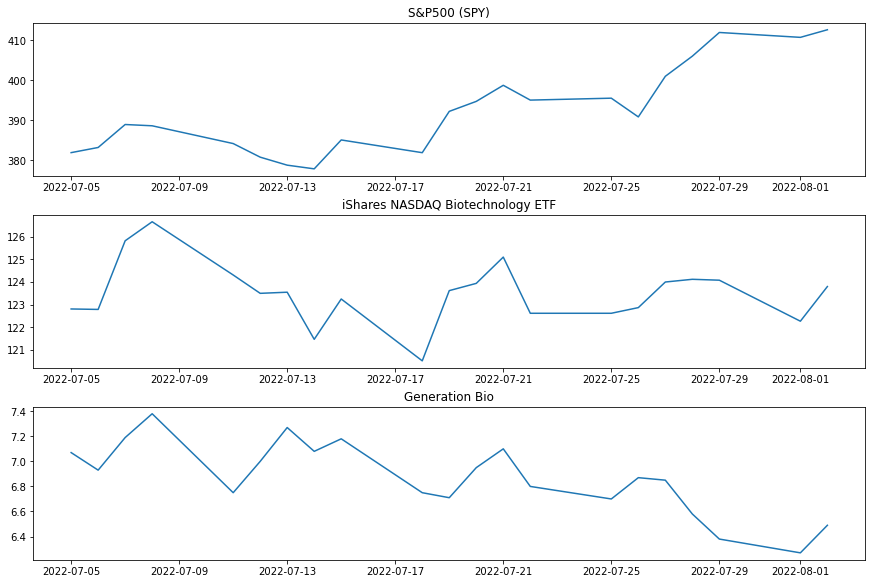

In [55]:
fig, axs = plt.subplots(3, 1, figsize=(12,8), constrained_layout=True)
# fig.tight_layout()
axs[0].plot(spy['Close'])
axs[0].set_title('S&P500 (SPY)')
# axs[0].plot([spy.iloc[0]['Close'], spy.iloc[-1]['Close']])
axs[1].plot(ibb['Close'])
axs[1].set_title('iShares NASDAQ Biotechnology ETF')
axs[2].plot(gbio['Close'])
axs[2].set_title('Generation Bio')

In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [119]:
dateStr = gbio.index.strftime("%m-%d-%Y")

fig = go.Figure(data=[go.Candlestick(x=dateStr,
                   open=gbio['Open'],
                   high=gbio['High'],
                   low=gbio['Low'],
                   close=gbio['Close'])])

fig.update_layout(
    title={
        'text': "Generation Bio (GBIO)",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=700, height=350)
fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

# Pie chart of portfolio composition

In [84]:
portfolio = {'TXG':9, 'ALLO':36, 'GBIO':78, 'IBB':5, 'NKTR':61, 'XBI':3, 'SPY':4}


In [146]:
securities = list(portfolio.keys())
print(securities)

shares = list(portfolio.values())
print(shares)

['TXG', 'ALLO', 'GBIO', 'IBB', 'NKTR', 'XBI', 'SPY']
[9, 36, 78, 5, 61, 3, 4]


In [120]:
current_share_prices = list()

for ticker in portfolio.keys():
    tickerData = yf.Ticker(ticker)
    todayData = tickerData.history(period='1d')
    current_share_prices.append(round(todayData['Close'][0], 2))

In [121]:
current_share_prices

[42.4, 13.62, 7.5, 127.33, 4.47, 84.08, 414.27]

In [126]:
market_values = [shares[i] * current_share_prices[i] for i in range(len(current_share_prices))]
market_values

[381.59999999999997,
 490.32,
 585.0,
 636.65,
 272.66999999999996,
 252.24,
 1657.08]

In [129]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'cornflower blue']

info = ['percent+label', 'value+label']

fig = go.Figure(data=[go.Pie(labels=list(portfolio.keys()),
                             values=list(market_values))])
fig.update_traces(hoverinfo='label+percent', textinfo=info[1], textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

# Plot all accounts as a single index

In [136]:
# S Phase All Accounts

selected_period = '6mo'

portfolio_dfs = list()

for security in list(portfolio.keys()):
    print(security)
    security_ticker = yf.Ticker(security)
    security_df = security_ticker.history(period = selected_period)
    portfolio_dfs.append(security_df)

TXG
ALLO
GBIO
IBB
NKTR
XBI
SPY


In [137]:
portfolio_dfs

[                 Open       High        Low      Close   Volume  Dividends  \
 Date                                                                         
 2022-02-04  90.480003  91.660004  87.583000  90.290001   751700          0   
 2022-02-07  90.339996  96.459999  89.945000  90.839996   609700          0   
 2022-02-08  90.000000  91.699997  87.629997  90.580002   408000          0   
 2022-02-09  91.699997  97.059998  91.699997  96.099998   609600          0   
 2022-02-10  92.629997  99.139999  91.320000  93.820000   897900          0   
 ...               ...        ...        ...        ...      ...        ...   
 2022-07-28  38.540001  40.369999  37.660000  39.900002  1415000          0   
 2022-07-29  39.660000  40.310001  38.400002  40.150002  1100600          0   
 2022-08-01  39.820000  40.590000  39.090000  39.840000   741600          0   
 2022-08-02  39.130001  41.720001  39.119999  40.799999   683000          0   
 2022-08-03  41.200001  42.650002  41.200001  42.400

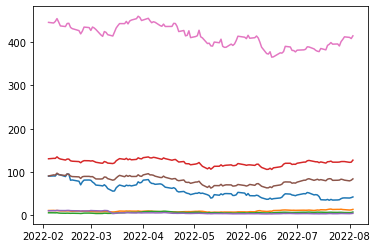

In [138]:
for security in portfolio_dfs:
    plt.plot(security['Close'])

In [151]:
# first, let's multiply each df by the number of shares we hold

scaled_dfs = list()

for i in range(len(shares)):
    scaled_df = portfolio_dfs[i] * shares[i]
    scaled_dfs.append(scaled_df)

scaled_dfs[0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-04,814.320030,824.940033,788.247002,812.610008,6765300,0,0
2022-02-07,813.059967,868.139992,809.504997,817.559967,5487300,0,0
2022-02-08,810.000000,825.299973,788.669975,815.220016,3672000,0,0
2022-02-09,825.299973,873.539978,825.299973,864.899986,5486400,0,0
2022-02-10,833.669975,892.259995,821.879997,844.379997,8081100,0,0
...,...,...,...,...,...,...,...
2022-07-28,346.860008,363.329990,338.939999,359.100014,12735000,0,0
2022-07-29,356.939999,362.790012,345.600014,361.350014,9905400,0,0
2022-08-01,358.379997,365.310001,351.810001,358.560001,6674400,0,0


In [157]:
# Next, let's add all of them together into an aggregate df

# all_accounts_df = pd.DataFrame(0, index=np.arange(len(scaled_dfs[0])), columns=scaled_dfs[0].columns)
# all_accounts_df

# for scaled_df in scaled_dfs:
#     all_accounts_df = all_accounts_df.add(scaled_df)
    
all_accounts_df = scaled_dfs[0].add(scaled_dfs[1])

for scaled_df in scaled_dfs[2:]:
    all_accounts_df = all_accounts_df.add(scaled_df)

In [158]:
all_accounts_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-04,4948.001246,5074.737285,4877.183952,5007.644207,722623600,0.0,0
2022-02-07,5023.818773,5150.143852,4981.153591,5030.280723,542633100,0.0,0
2022-02-08,5011.268996,5060.730627,4904.493573,5021.822701,505831500,0.0,0
2022-02-09,5080.980201,5218.415059,5062.467005,5194.886621,625052000,0.0,0
2022-02-10,5077.376462,5253.109030,4973.627963,5033.998890,861376300,0.0,0
...,...,...,...,...,...,...,...
2022-07-28,4113.620062,4160.619944,3962.470022,4088.770062,502844700,0.0,0
2022-07-29,4083.119969,4127.150018,3997.329985,4079.579970,577749700,0.0,0
2022-08-01,4043.899938,4095.770010,3972.449977,4006.749938,636345000,0.0,0


In [159]:
dateStr = all_accounts_df.index.strftime("%m-%d-%Y")

fig = go.Figure(data=[go.Candlestick(x=dateStr,
                   open=all_accounts_df['Open'],
                   high=all_accounts_df['High'],
                   low=all_accounts_df['Low'],
                   close=all_accounts_df['Close'])])

fig.update_layout(
    title={
        'text': "S Phase (All Accounts)",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=700, height=350)
fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

In [162]:
dateStr = spy.index.strftime("%m-%d-%Y")

fig = go.Figure(data=[go.Candlestick(x=dateStr,
                   open=spy['Open'],
                   high=spy['High'],
                   low=spy['Low'],
                   close=spy['Close'])])

fig.update_layout(
    title={
        'text': "SPY",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=700, height=350)
fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

# Let's create a simple df comparing returns for all accounts vs. reference indices that we will post in Streamlit

In [183]:
reference_stocks = [spy, ibb]
reference_stock_names = ['SPY', 'IBB']

references_returns = [round(((stock['Close'][-1] - stock['Close'][0]) / stock['Close'][0]) * 100, 1) for stock in reference_stocks]

references_returns

[-6.9, -2.4]

In [184]:
references_returns_df = pd.DataFrame(references_returns, index=reference_stock_names,
                                    columns=['% Return'])
references_returns_df

,% Return
SPY,-6.9
IBB,-2.4


In [180]:
portfolio_stocks = [all_accounts_df] + portfolio_dfs.copy()
# portfolio_stocks.append(portfolio_dfs.copy())
portfolio_stock_names = ['All Accounts', 'TXG', 'ALLO', 'GBIO', 'IBB', 'NKTR', 'XBI', 'SPY']

portfolio_returns = [round(((stock['Close'][-1] - stock['Close'][0]) / stock['Close'][0]) * 100, 1) for stock in portfolio_stocks]

print(portfolio_stock_names)
portfolio_returns

['All Accounts', 'TXG', 'ALLO', 'GBIO', 'IBB', 'NKTR', 'XBI', 'SPY']


[-14.6, -53.0, 23.6, 28.9, -2.4, -57.3, -7.4, -7.0]

In [186]:
portfolio_returns_df = pd.DataFrame(portfolio_returns, index=portfolio_stock_names,
                                    columns=['% Return'])
portfolio_returns_df

,% Return
All Accounts,-14.6
TXG,-53.0
ALLO,23.6
GBIO,28.9
IBB,-2.4
NKTR,-57.3
XBI,-7.4
SPY,-7.0
